# Explore here

In [1]:
# Import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2, SelectKBest

In [2]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
# data.to_csv("../data/raw/data.csv", index=False)
data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [3]:
# Tamaño de mis datos
data.shape

(3140, 108)

In [4]:
# Informacion general de mis datos
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [5]:
# Búsqueda de duplicados
# display(data[data.duplicated(keep=False)])

data = data.drop_duplicates()
data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [6]:
# Selección de atributos relevantes

# Eliminacion de columna "fips" representativa de codigo asignado a cada condado
data = data.drop("fips", axis=1)

In [7]:
# Agrupacion de rangos de edades mas amplia en valores porcentuales respecto al "TOT_POP"
data["0-19 %"] = (data["0-9"] + data["19-Oct"])*100/data["TOT_POP"]
data["20-49 %"] = (data["20-29"] + data["30-39"] + data["40-49"])*100/data["TOT_POP"]
data["50+ %"] = (data["50-59"] + data["60-69"] + data["70-79"] + data["80+"])*100/data["TOT_POP"]

# Columnas con rango de edades a eliminar
cols_to_drop = data.columns[1:19]
data = data.drop(columns=cols_to_drop)

In [8]:
# Columnas con datos etnicos a eliminar, mantengo los datos porcentuales
cols_to_drop = ["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop", 
                "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"]
data = data.drop(columns=cols_to_drop)

In [9]:
# Analisis de igualdad entre columna "TOT_POP" y "POP_ESTIMATE_2018"
equals = data["TOT_POP"] ==  data["POP_ESTIMATE_2018"]
display(equals.value_counts()) # Las columnas son exactamente iguales en sus datos, se procede a eliminar "POP_ESTIMATE_2018"
data = data.drop("POP_ESTIMATE_2018", axis=1)

True    3140
Name: count, dtype: int64

In [10]:
# Eliminacion de datos de nivel academico, mantengo los datos porcentuales
cols_to_drop = ["Less than a high school diploma 2014-18", "High school diploma only 2014-18", 
                "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18"]
data = data.drop(columns=cols_to_drop)

In [11]:
# Elimino rango de edades y mantengo los ya agrupados al inicio
cols_to_drop = ["Population Aged 60+", "Percent of Population Aged 60+"]
data = data.drop(columns=cols_to_drop)

In [12]:
# Eliminacion de datos de margen de error o incertidumbre y los datos totales en bruto, mantengo la prevalencia
cols_to_drop = ["anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "anycondition_number", 
                "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Obesity_number", 
                "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "Heart disease_number", 
                "COPD_Lower 95% CI", "COPD_Upper 95% CI", "COPD_number", 
                "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "diabetes_number", 
                "CKD_Lower 95% CI", "CKD_Upper 95% CI", "CKD_number"]
data = data.drop(columns=cols_to_drop)

In [13]:
# Eliminacion de datos que representan tasas porcentuales, grupos de edades diferentes a los agrupados y codigos de estado que no aportan
cols_to_drop = ["CI90LBINC_2018", "CI90UBINC_2018", "Unemployment_rate_2018", "STATE_FIPS", "county_pop2018_18 and older", 
                "Total Population", "COUNTY_NAME", "STATE_NAME", "CNTY_FIPS"]
data = data.drop(columns=cols_to_drop)

In [14]:
# Con la seleccion anterior de atributos relevantes reducimos el tamaño de nuestros datos en mas de la mitad
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 52 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   TOT_POP                                                                        3140 non-null   int64  
 1   % White-alone                                                                  3140 non-null   float64
 2   % Black-alone                                                                  3140 non-null   float64
 3   % NA/AI-alone                                                                  3140 non-null   float64
 4   % Asian-alone                                                                  3140 non-null   float64
 5   % Hawaiian/PI-alone                                                            3140 non-null   float64
 6   % Two or more races     

In [15]:
# Defino "Heart disease_prevalence" como mi variable a predecir, es de tipo continua y no presenta valores nulos ni faltantes
# El dataset es susceptible de sufrir mas cambios o eliminaciones a medida que avance el analisis

In [16]:
# ANALISIS DE VARIABLES CATEGORICAS >> "Urban_rural_code"
data.Urban_rural_code.value_counts()

Urban_rural_code
6    1333
5     641
3     372
2     368
4     358
1      68
Name: count, dtype: int64

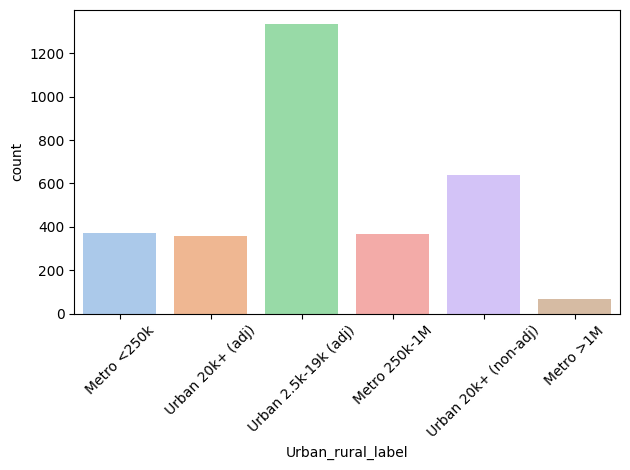

In [17]:
urban_rural_labels = {
    1: "Metro >1M",
    2: "Metro 250k-1M",
    3: "Metro <250k",
    4: "Urban 20k+ (adj)",
    5: "Urban 20k+ (non-adj)",
    6: "Urban 2.5k-19k (adj)",
    7: "Urban 2.5k-19k (non-adj)",
    8: "Rural <2.5k (adj)",
    9: "Rural <2.5k (non-adj)",
    88: "Unknown (AK/HI)",
    99: "Unknown (Other)"
}

data['Urban_rural_label'] = data['Urban_rural_code'].map(urban_rural_labels)

sns.countplot(data=data, x='Urban_rural_label', palette='pastel', hue='Urban_rural_label', legend=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Elimino la columna creada anteriormente que era solo para graficar los labels de los tipos de condados
data = data.drop('Urban_rural_label', axis=1)

Mayoría  de condados representativos de pooblaciones urbanas adyacentes a zonas metropolitanas con entre 2500 y 19000 habitantes, el resto de condados se mantiene entre 400 y 600 datos cada uno siendo el menor las zonas metropolitanas de 1 millon de habitantes o mas.

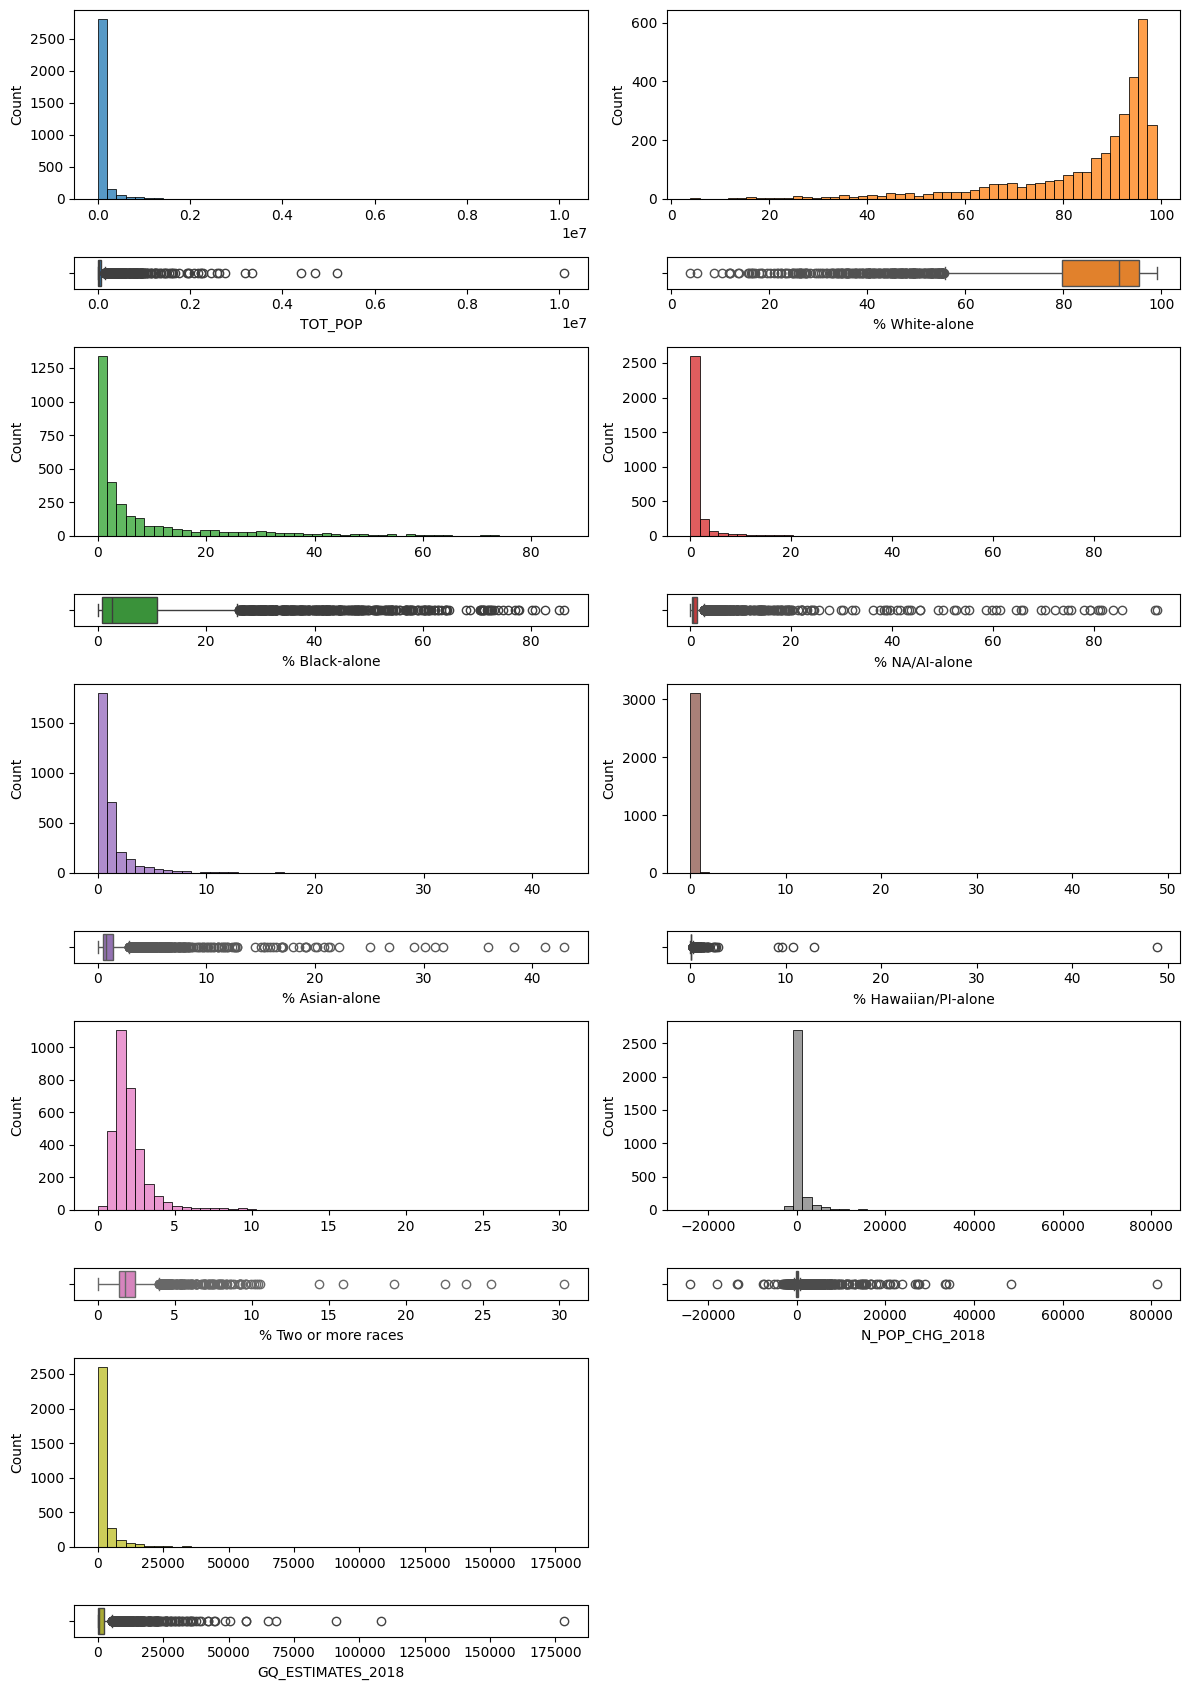

In [18]:
# ANALISIS DE VARIABLES NUMERICAS
fig, axis = plt.subplots(10, 2, figsize = (12, 17), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# TOT_POP
sns.histplot(ax = axis[0, 0], data = data, x = "TOT_POP", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "TOT_POP", color="#1f77b4").set(xlabel = "TOT_POP")

# % White-alone
sns.histplot(ax = axis[0, 1], data = data, x = "% White-alone", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "% White-alone", color="#ff7f0e").set(xlabel = "% White-alone")

# % Black-alone
sns.histplot(ax = axis[2, 0], data = data, x = "% Black-alone", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "% Black-alone", color="#2ca02c").set(xlabel = "% Black-alone")

# % NA/AI-alone
sns.histplot(ax = axis[2, 1], data = data, x = "% NA/AI-alone", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "% NA/AI-alone", color="#d62728").set(xlabel = "% NA/AI-alone")

# % Asian-alone
sns.histplot(ax = axis[4, 0], data = data, x = "% Asian-alone", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "% Asian-alone", color="#9467bd").set(xlabel = "% Asian-alone")

# % Hawaiian/PI-alone
sns.histplot(ax = axis[4, 1], data = data, x = "% Hawaiian/PI-alone", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "% Hawaiian/PI-alone", color="#8c564b").set(xlabel = "% Hawaiian/PI-alone")

# % Two or more races
sns.histplot(ax = axis[6, 0], data = data, x = "% Two or more races", bins=50, color="#e377c2").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "% Two or more races", color="#e377c2").set(xlabel = "% Two or more races")

# N_POP_CHG_2018
sns.histplot(ax = axis[6, 1], data = data, x = "N_POP_CHG_2018", bins=50, color="#7f7f7f").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "N_POP_CHG_2018", color="#7f7f7f").set(xlabel = "N_POP_CHG_2018")

# GQ_ESTIMATES_2018
sns.histplot(ax = axis[8, 0], data = data, x = "GQ_ESTIMATES_2018", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data, x = "GQ_ESTIMATES_2018", color="#bcbd22").set(xlabel = "GQ_ESTIMATES_2018")

axis[8, 1].axis("off")
axis[9, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

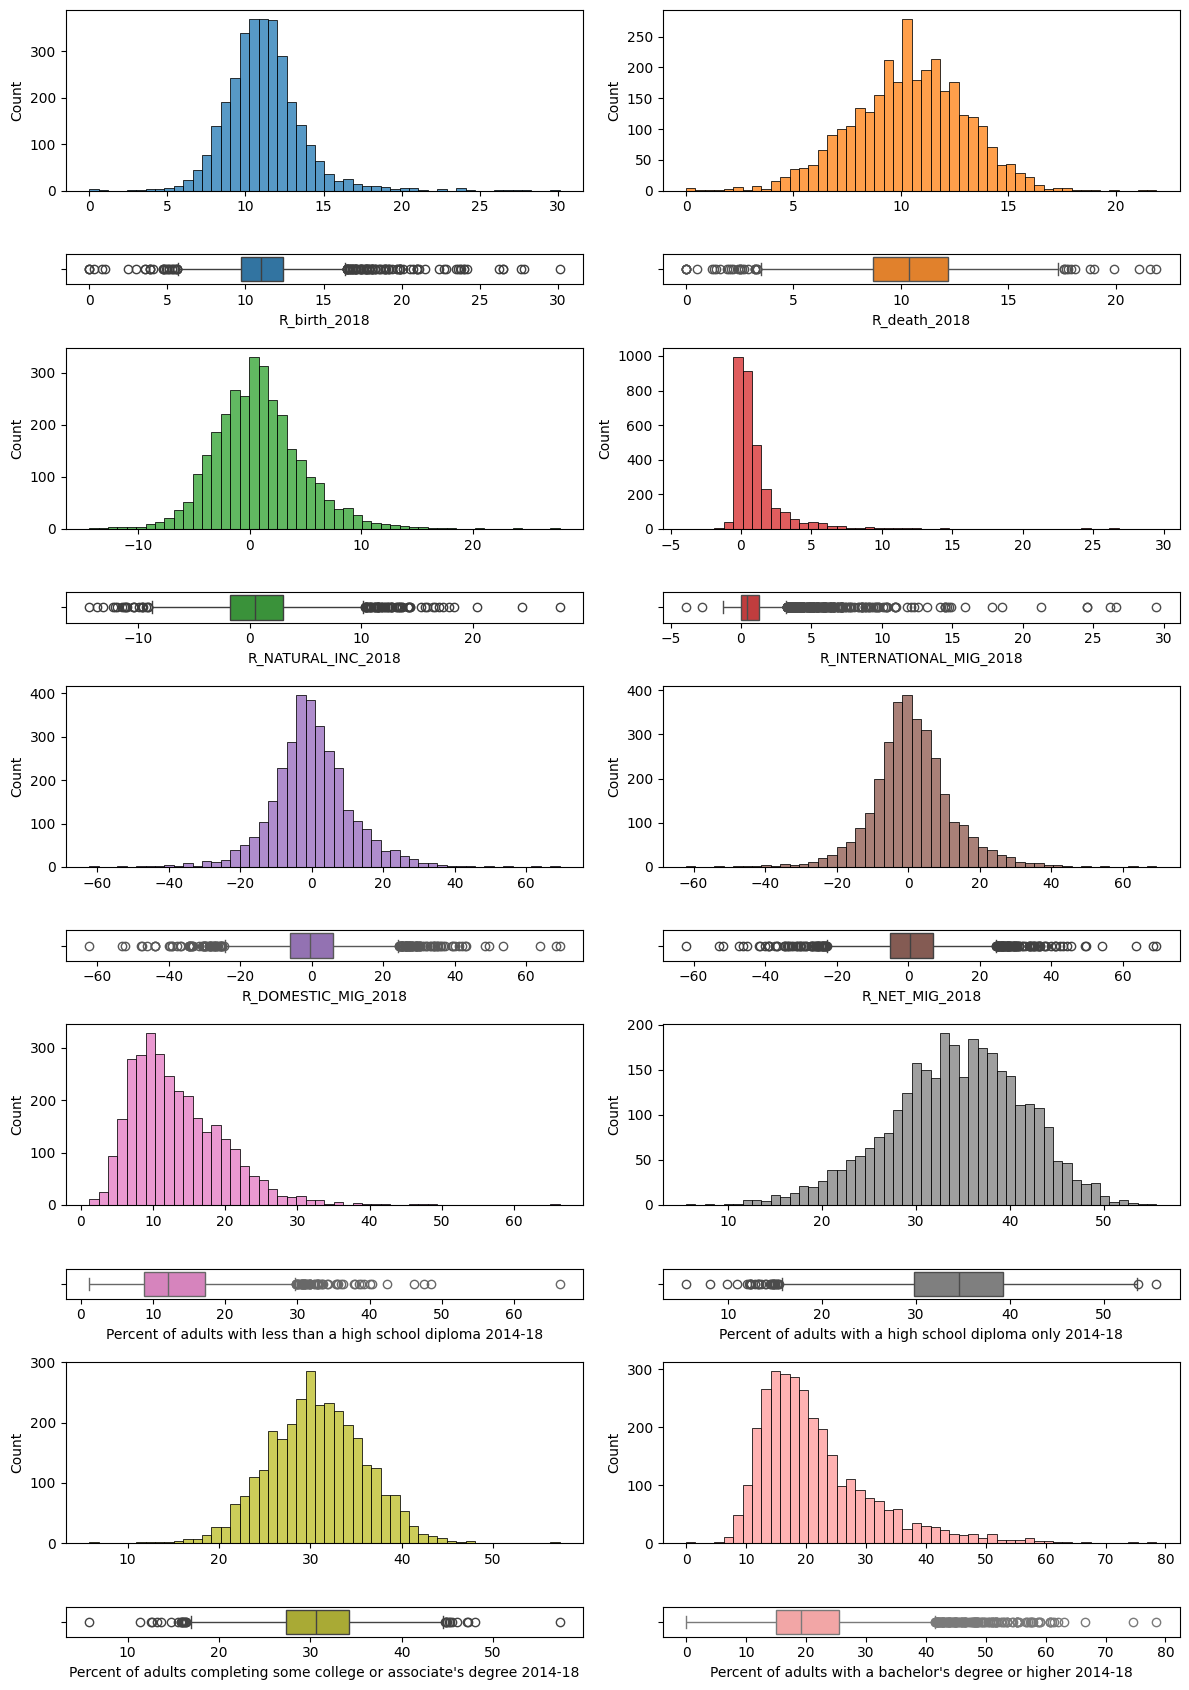

In [23]:
fig, axis = plt.subplots(10, 2, figsize = (12, 17), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# R_birth_2018
sns.histplot(ax = axis[0, 0], data = data, x = "R_birth_2018", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "R_birth_2018", color="#1f77b4").set(xlabel = "R_birth_2018")

# R_death_2018
sns.histplot(ax = axis[0, 1], data = data, x = "R_death_2018", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "R_death_2018", color="#ff7f0e").set(xlabel = "R_death_2018")

# R_NATURAL_INC_2018
sns.histplot(ax = axis[2, 0], data = data, x = "R_NATURAL_INC_2018", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "R_NATURAL_INC_2018", color="#2ca02c").set(xlabel = "R_NATURAL_INC_2018")

# R_INTERNATIONAL_MIG_2018
sns.histplot(ax = axis[2, 1], data = data, x = "R_INTERNATIONAL_MIG_2018", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "R_INTERNATIONAL_MIG_2018", color="#d62728").set(xlabel = "R_INTERNATIONAL_MIG_2018")

# R_DOMESTIC_MIG_2018
sns.histplot(ax = axis[4, 0], data = data, x = "R_DOMESTIC_MIG_2018", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "R_DOMESTIC_MIG_2018", color="#9467bd").set(xlabel = "R_DOMESTIC_MIG_2018")

# R_NET_MIG_2018
sns.histplot(ax = axis[4, 1], data = data, x = "R_NET_MIG_2018", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "R_NET_MIG_2018", color="#8c564b").set(xlabel = "R_NET_MIG_2018")

# Percent of adults with less than a high school diploma 2014-18
sns.histplot(ax = axis[6, 0], data = data, x = "Percent of adults with less than a high school diploma 2014-18", bins=50, color="#e377c2").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "Percent of adults with less than a high school diploma 2014-18", color="#e377c2").set(xlabel = "Percent of adults with less than a high school diploma 2014-18")

# Percent of adults with a high school diploma only 2014-18
sns.histplot(ax = axis[6, 1], data = data, x = "Percent of adults with a high school diploma only 2014-18", bins=50, color="#7f7f7f").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "Percent of adults with a high school diploma only 2014-18", color="#7f7f7f").set(xlabel = "Percent of adults with a high school diploma only 2014-18")

# Percent of adults completing some college or associate's degree 2014-18
sns.histplot(ax = axis[8, 0], data = data, x = "Percent of adults completing some college or associate's degree 2014-18", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data, x = "Percent of adults completing some college or associate's degree 2014-18", color="#bcbd22").set(xlabel = "Percent of adults completing some college or associate's degree 2014-18")

# Percent of adults with a bachelor's degree or higher 2014-18
sns.histplot(ax = axis[8, 1], data = data, x = "Percent of adults with a bachelor's degree or higher 2014-18", bins=50, color="#FF9999").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = data, x = "Percent of adults with a bachelor's degree or higher 2014-18", color="#FF9999").set(xlabel = "Percent of adults with a bachelor's degree or higher 2014-18")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

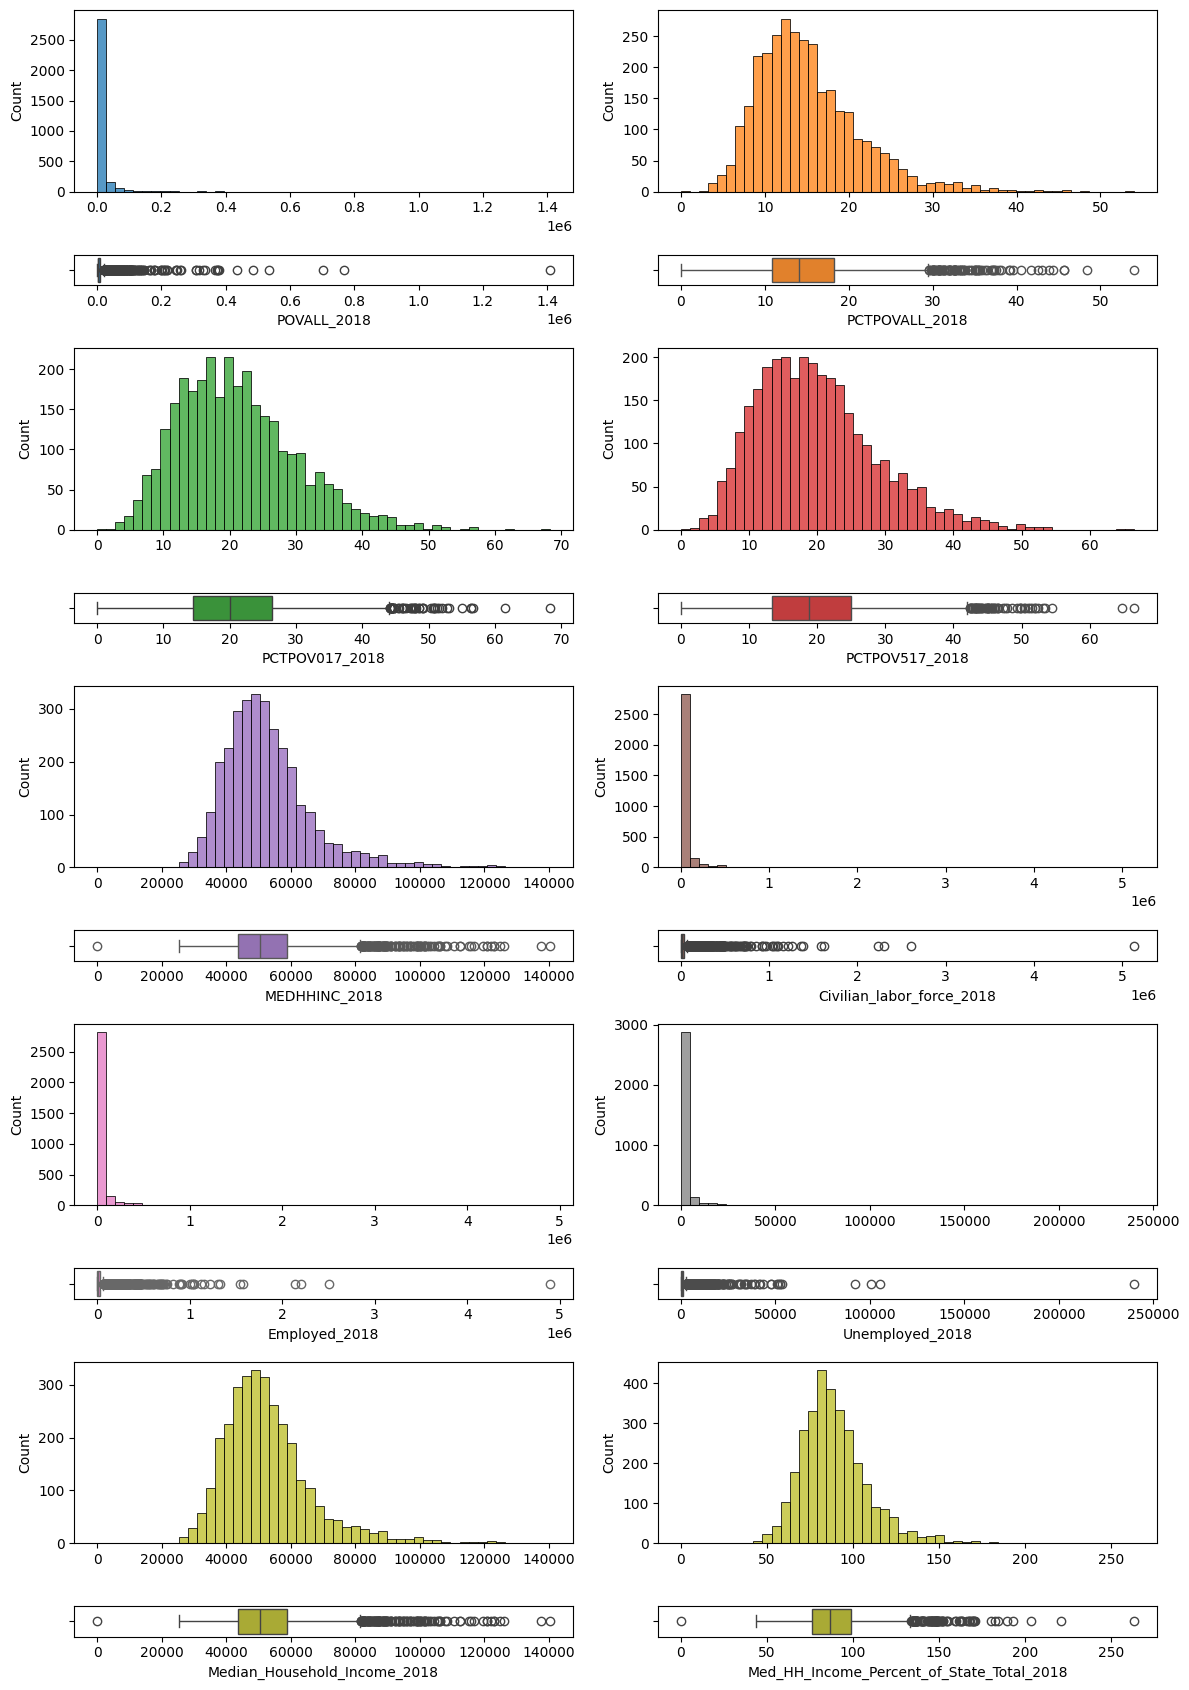

In [25]:
# ANALISIS DE VARIABLES NUMERICAS
fig, axis = plt.subplots(10, 2, figsize = (12, 17), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# POVALL_2018
sns.histplot(ax = axis[0, 0], data = data, x = "POVALL_2018", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "POVALL_2018", color="#1f77b4").set(xlabel = "POVALL_2018")

# PCTPOVALL_2018
sns.histplot(ax = axis[0, 1], data = data, x = "PCTPOVALL_2018", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "PCTPOVALL_2018", color="#ff7f0e").set(xlabel = "PCTPOVALL_2018")

# PCTPOV017_2018
sns.histplot(ax = axis[2, 0], data = data, x = "PCTPOV017_2018", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "PCTPOV017_2018", color="#2ca02c").set(xlabel = "PCTPOV017_2018")

# PCTPOV517_2018
sns.histplot(ax = axis[2, 1], data = data, x = "PCTPOV517_2018", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "PCTPOV517_2018", color="#d62728").set(xlabel = "PCTPOV517_2018")

# MEDHHINC_2018
sns.histplot(ax = axis[4, 0], data = data, x = "MEDHHINC_2018", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "MEDHHINC_2018", color="#9467bd").set(xlabel = "MEDHHINC_2018")

# Civilian_labor_force_2018
sns.histplot(ax = axis[4, 1], data = data, x = "Civilian_labor_force_2018", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "Civilian_labor_force_2018", color="#8c564b").set(xlabel = "Civilian_labor_force_2018")

# Employed_2018
sns.histplot(ax = axis[6, 0], data = data, x = "Employed_2018", bins=50, color="#e377c2").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "Employed_2018", color="#e377c2").set(xlabel = "Employed_2018")

# Unemployed_2018
sns.histplot(ax = axis[6, 1], data = data, x = "Unemployed_2018", bins=50, color="#7f7f7f").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "Unemployed_2018", color="#7f7f7f").set(xlabel = "Unemployed_2018")

# Median_Household_Income_2018
sns.histplot(ax = axis[8, 0], data = data, x = "Median_Household_Income_2018", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data, x = "Median_Household_Income_2018", color="#bcbd22").set(xlabel = "Median_Household_Income_2018")

# Med_HH_Income_Percent_of_State_Total_2018
sns.histplot(ax = axis[8, 1], data = data, x = "Med_HH_Income_Percent_of_State_Total_2018", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = data, x = "Med_HH_Income_Percent_of_State_Total_2018", color="#bcbd22").set(xlabel = "Med_HH_Income_Percent_of_State_Total_2018")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

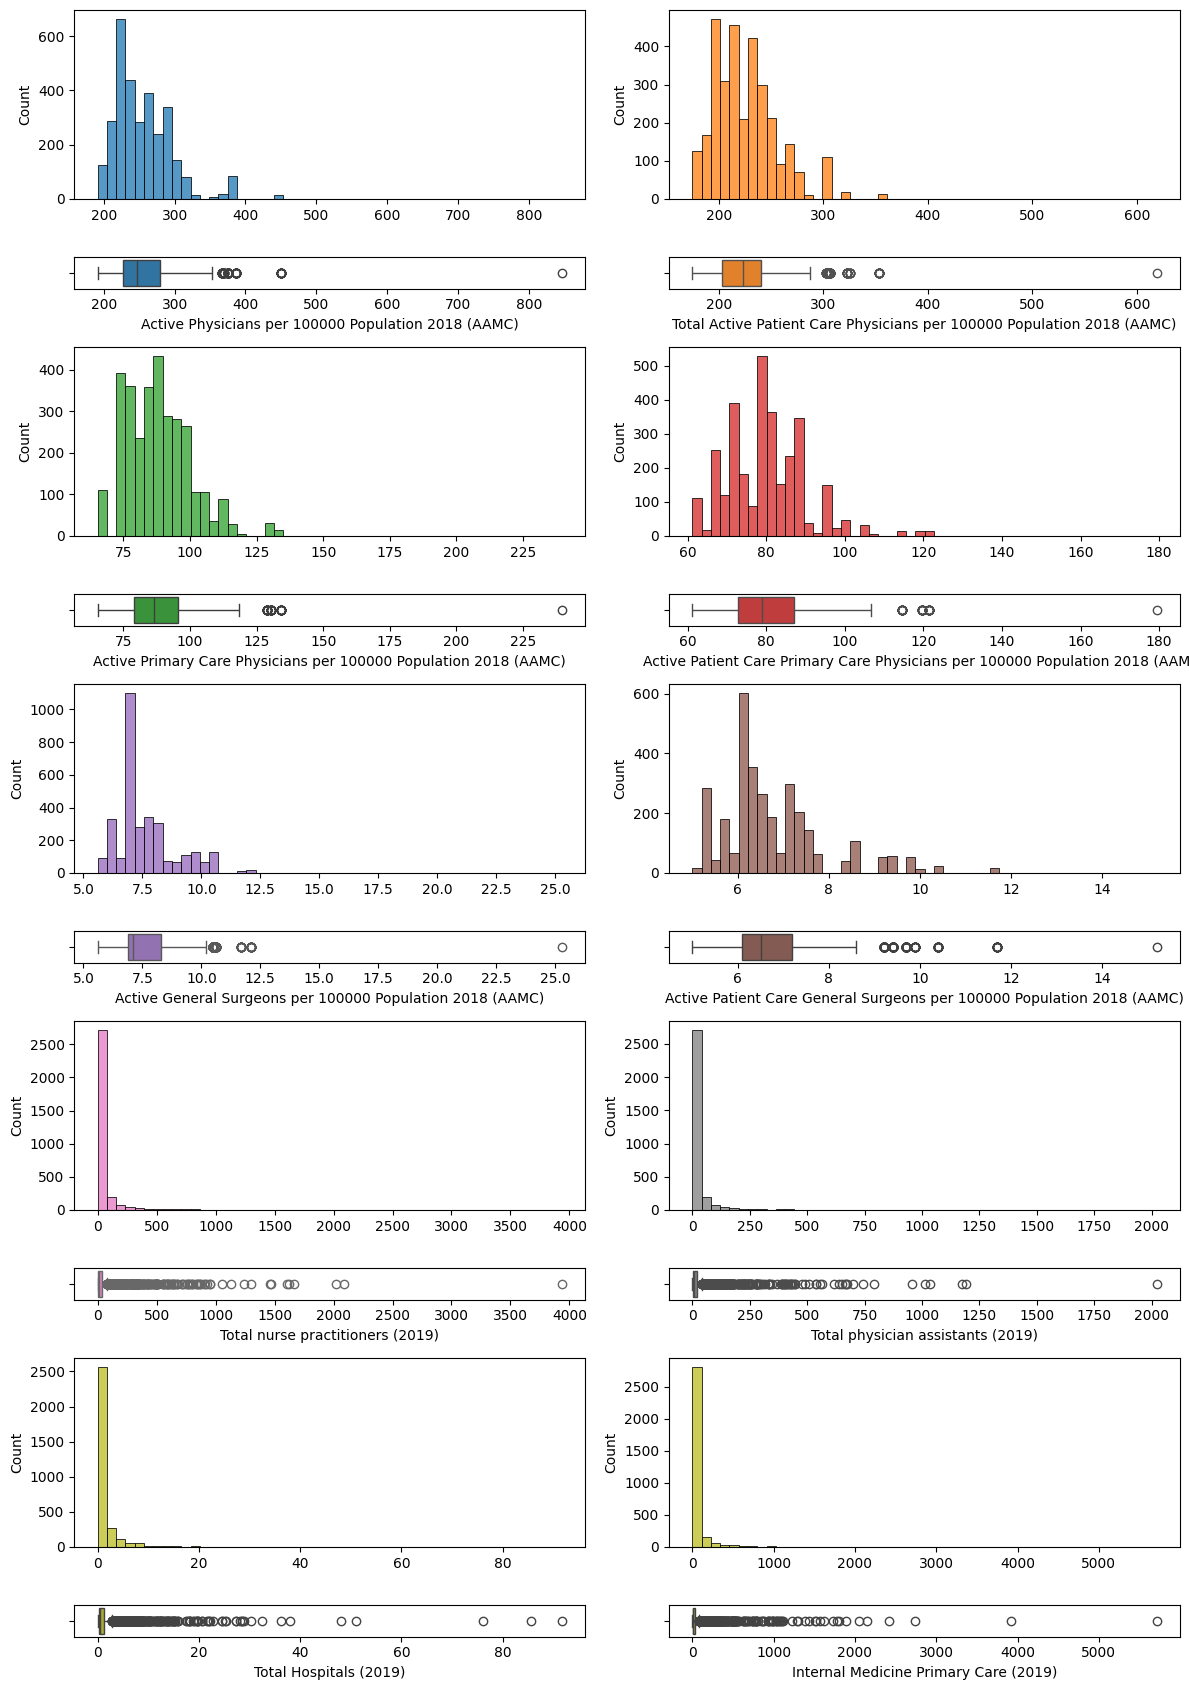

In [27]:
# ANALISIS DE VARIABLES NUMERICAS
fig, axis = plt.subplots(10, 2, figsize = (12, 17), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# Active Physicians per 100000 Population 2018 (AAMC)
sns.histplot(ax = axis[0, 0], data = data, x = "Active Physicians per 100000 Population 2018 (AAMC)", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Active Physicians per 100000 Population 2018 (AAMC)", color="#1f77b4").set(xlabel = "Active Physicians per 100000 Population 2018 (AAMC)")

# Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)
sns.histplot(ax = axis[0, 1], data = data, x = "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", color="#ff7f0e").set(xlabel = "Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)")

# Active Primary Care Physicians per 100000 Population 2018 (AAMC)
sns.histplot(ax = axis[2, 0], data = data, x = "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", color="#2ca02c").set(xlabel = "Active Primary Care Physicians per 100000 Population 2018 (AAMC)")

# Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)
sns.histplot(ax = axis[2, 1], data = data, x = "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)", color="#d62728").set(xlabel = "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)")

# Active General Surgeons per 100000 Population 2018 (AAMC)
sns.histplot(ax = axis[4, 0], data = data, x = "Active General Surgeons per 100000 Population 2018 (AAMC)", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "Active General Surgeons per 100000 Population 2018 (AAMC)", color="#9467bd").set(xlabel = "Active General Surgeons per 100000 Population 2018 (AAMC)")

# Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)
sns.histplot(ax = axis[4, 1], data = data, x = "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", color="#8c564b").set(xlabel = "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)")

# Total nurse practitioners (2019)
sns.histplot(ax = axis[6, 0], data = data, x = "Total nurse practitioners (2019)", bins=50, color="#e377c2").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "Total nurse practitioners (2019)", color="#e377c2").set(xlabel = "Total nurse practitioners (2019)")

# Total physician assistants (2019)
sns.histplot(ax = axis[6, 1], data = data, x = "Total physician assistants (2019)", bins=50, color="#7f7f7f").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "Total physician assistants (2019)", color="#7f7f7f").set(xlabel = "Total physician assistants (2019)")

# Total Hospitals (2019)
sns.histplot(ax = axis[8, 0], data = data, x = "Total Hospitals (2019)", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data, x = "Total Hospitals (2019)", color="#bcbd22").set(xlabel = "Total Hospitals (2019)")

# Internal Medicine Primary Care (2019)
sns.histplot(ax = axis[8, 1], data = data, x = "Internal Medicine Primary Care (2019)", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = data, x = "Internal Medicine Primary Care (2019)", color="#bcbd22").set(xlabel = "Internal Medicine Primary Care (2019)")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

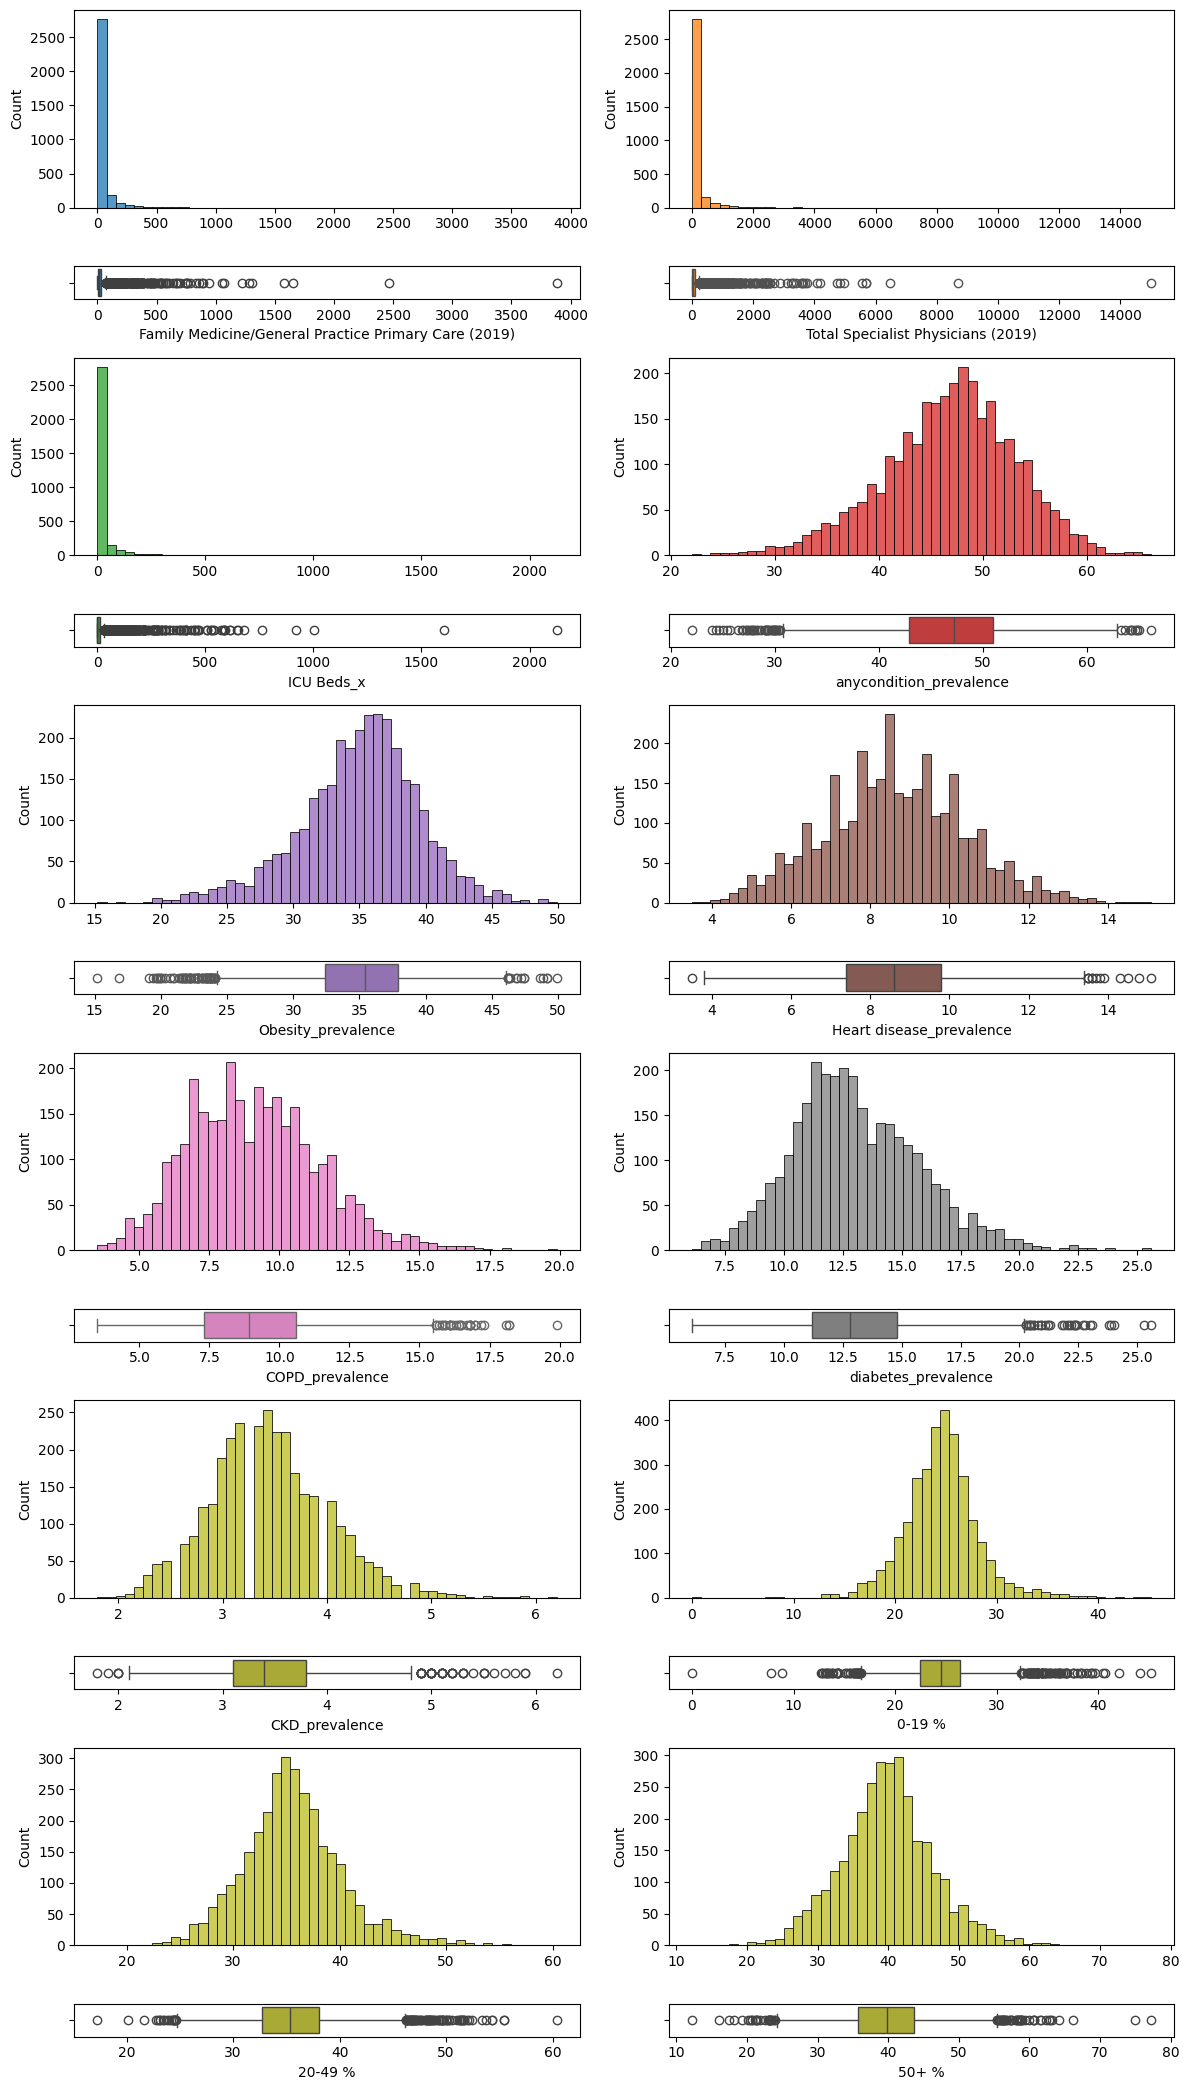

In [29]:
# ANALISIS DE VARIABLES NUMERICAS
fig, axis = plt.subplots(12, 2, figsize = (12, 21), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# Family Medicine/General Practice Primary Care (2019)
sns.histplot(ax = axis[0, 0], data = data, x = "Family Medicine/General Practice Primary Care (2019)", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Family Medicine/General Practice Primary Care (2019)", color="#1f77b4").set(xlabel = "Family Medicine/General Practice Primary Care (2019)")

# Total Specialist Physicians (2019)
sns.histplot(ax = axis[0, 1], data = data, x = "Total Specialist Physicians (2019)", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Total Specialist Physicians (2019)", color="#ff7f0e").set(xlabel = "Total Specialist Physicians (2019)")

# ICU Beds_x
sns.histplot(ax = axis[2, 0], data = data, x = "ICU Beds_x", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "ICU Beds_x", color="#2ca02c").set(xlabel = "ICU Beds_x")

# anycondition_prevalence
sns.histplot(ax = axis[2, 1], data = data, x = "anycondition_prevalence", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "anycondition_prevalence", color="#d62728").set(xlabel = "anycondition_prevalence")

# Obesity_prevalence
sns.histplot(ax = axis[4, 0], data = data, x = "Obesity_prevalence", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "Obesity_prevalence", color="#9467bd").set(xlabel = "Obesity_prevalence")

# Heart disease_prevalence
sns.histplot(ax = axis[4, 1], data = data, x = "Heart disease_prevalence", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "Heart disease_prevalence", color="#8c564b").set(xlabel = "Heart disease_prevalence")

# COPD_prevalence
sns.histplot(ax = axis[6, 0], data = data, x = "COPD_prevalence", bins=50, color="#e377c2").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "COPD_prevalence", color="#e377c2").set(xlabel = "COPD_prevalence")

# diabetes_prevalence
sns.histplot(ax = axis[6, 1], data = data, x = "diabetes_prevalence", bins=50, color="#7f7f7f").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "diabetes_prevalence", color="#7f7f7f").set(xlabel = "diabetes_prevalence")

# CKD_prevalence
sns.histplot(ax = axis[8, 0], data = data, x = "CKD_prevalence", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data, x = "CKD_prevalence", color="#bcbd22").set(xlabel = "CKD_prevalence")

# 0-19 %
sns.histplot(ax = axis[8, 1], data = data, x = "0-19 %", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = data, x = "0-19 %", color="#bcbd22").set(xlabel = "0-19 %")

# 20-49 %
sns.histplot(ax = axis[10, 0], data = data, x = "20-49 %", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[11, 0], data = data, x = "20-49 %", color="#bcbd22").set(xlabel = "20-49 %")

# 50+ %
sns.histplot(ax = axis[10, 1], data = data, x = "50+ %", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[11, 1], data = data, x = "50+ %", color="#bcbd22").set(xlabel = "50+ %")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()